In [12]:
import os
import glob
import pandas as pd 
import numpy as np 


In [3]:
embryo_lst = []
static_lst = []
last_lst = []
max_lst = []

for image in glob.glob('/data/embryo/method_2/*.jpg'):
    basename = os.path.splitext(image)[0]
    basename = basename.rsplit('/', 1)[-1]
    embryo = basename.rsplit('_', 1)[0]
    embryo_lst.append(embryo)
    static_time = basename.rsplit('_', 1)[-1]
    static_lst.append(static_time)
    for last_img in glob.glob('/data/embryo/method_1/*.jpg'):
        last_basename = os.path.splitext(last_img)[0]
        last_basename = last_basename.rsplit('/', 1)[-1]
        last_embryo = last_basename.rsplit('_', 1)[0]
        last_time = last_basename.rsplit('_', 1)[-1]
        if last_embryo == embryo:
            last_lst.append(last_time)
        else:
            pass
    for max_img in glob.glob('/data/embryo/method_3/*.jpg'):
        max_basename = os.path.splitext(max_img)[0]
        max_basename = max_basename.rsplit('/', 1)[-1]
        max_embryo = max_basename.rsplit('_', 1)[0]
        max_time = max_basename.rsplit('_', 1)[-1]
        if max_embryo == embryo:
            max_lst.append(max_time)
        else:
            pass


In [16]:
print(embryo_lst[0])
print(static_lst[0])
print(last_lst[0])
print(max_lst[0])

D2018_07_04_S00250_I0831_D_pdb_E2
6805
7021
7021


In [18]:
method_1 = []
method_3 = []

for i in range(len(embryo_lst)):
    static = int(static_lst[i])
    last = int(last_lst[i])
    max = int(max_lst[i])
    method_1_diff = abs(static - last)
    method_1.append(method_1_diff)
    method_3_diff = abs(static - max)
    method_3.append(method_3_diff)


In [22]:
df = pd.DataFrame({'Embryo': embryo_lst, 'Static time': static_lst, 'Last time': last_lst, 'Max time': max_lst, 'Method 1': method_1, 'Method 3': method_3})


In [23]:
df.to_csv('/home/embryosu/git/su/embryo/method_time_diff.csv')

In [4]:
df = pd.read_csv('/home/embryosu/git/su/embryo/method_time_diff.csv')

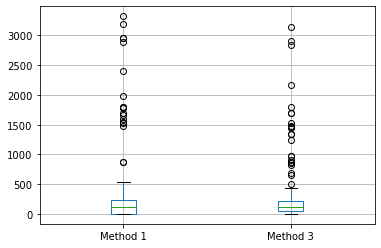

In [5]:
boxplot = df.boxplot(column= ['Method 1', 'Method 3'])

In [9]:
data_1 = df['Method 1']

In [10]:
data_3 = df['Method 3']

In [13]:
median_1 = np.median(data_1)

In [14]:
median_1

110.0

In [15]:
median_3 = np.median(data_3)

In [16]:
median_3

121.0

In [19]:
lq_1 = np.percentile(data_1, 25)
uq_1 = np.percentile(data_1, 75)
lq_3 = np.percentile(data_3, 25)
uq_3 = np.percentile(data_3, 75)
iqr_1 = uq_1 - lq_1
iqr_3 = uq_3 - lq_3
min_1 = data_1[data_1<= uq_1 +1.5*iqr_1].min()
min_3 = data_3[data_3<= uq_3 +1.5*iqr_3].min()
max_1 = data_1[data_1>= uq_1 +1.5*iqr_1].max()
max_3 = data_3[data_3>= uq_3 +1.5*iqr_3].max()


In [20]:
print(min_1, lq_1, median_1, uq_1, max_1)
print(min_3, lq_3, median_3, uq_3, max_3)

0 0.0 110.0 238.5 3322
0 43.75 121.0 211.5 3138
